## Loading libraries

In [32]:
%pip install nltk
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install keras


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 284.1/284.1 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 KB 1.6 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 15.8/15.8 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 KB 1.4 MB/s eta 0:00:00
     ------------------------------------ 413.2/413.2 KB 661.7 kB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
     ---------------------------------------- 2.7/2.7 MB 1.5 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 3.7/3.7 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.5 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached termcolor-2.3.0-py3-none-an

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\GAREEMA\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [50]:
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import string

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
sns.set_theme('notebook')

# Loading a file

In [3]:
human_stress=pd.read_csv('./Stress_dataset.csv')

In [4]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(16, 16)","He said he had not felt that way before, sugge...",1,0.8,1516616353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009815
2,ptsd,9ch1zh,"(16, 16)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 16]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1515274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 16)",It cleared up and I was okay but. On Monday ...,1,0.8,1683581674
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1616843984
9,assistance,61eiq6,"[16, 16]",I just feel like the street life has fucked my...,1,1.0,1670428087


In [5]:
human_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [6]:
human_stress['subreddit'].value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

# Feature Engineering

In [7]:
human_stress['len']=[len(text) for text in human_stress['text']]

In [8]:
human_stress['label_in_value']=human_stress['label'].map({0:'No Stress',1:"Stress"})

In [9]:
human_stress['date']=[ datetime.fromtimestamp(value) for value in human_stress['social_timestamp']]

In [10]:
human_stress['day']=[value for value in human_stress['date'].dt.day]
human_stress['day'].head(10)

0    22
1    22
2     3
3    20
4    18
5     7
6    10
7     9
8    27
9     7
Name: day, dtype: int64

In [11]:
human_stress['month']=[value for value in human_stress['date'].dt.month]
human_stress['month'].head(10)

0     1
1     5
2     9
3     1
4    10
5     1
6    12
7     5
8     3
9    12
Name: month, dtype: int64

In [12]:
human_stress['year']=[value for value in human_stress['date'].dt.year]
human_stress['year'].head(20)

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2017
7     2023
8     2021
9     2022
10    2018
11    2018
12    2021
13    2021
14    2022
15    2021
16    2021
17    2021
18    2021
19    2021
Name: year, dtype: int64

In [13]:
human_stress['hour']=[value for value in human_stress['date'].dt.hour]

In [14]:
human_stress['second']=[value for value in human_stress['date'].dt.second]

In [15]:
human_stress['day_name']=[value for value in human_stress['date'].dt.day_name()]

In [16]:
human_stress['day_of_week']=[value for value in human_stress['date'].dt.day_of_week]

In [17]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,len,label_in_value,date,day,month,year,hour,second,day_name,day_of_week
0,ptsd,8601tu,"(16, 16)","He said he had not felt that way before, sugge...",1,0.8,1516616353,571,Stress,2018-01-22 15:49:13,22,1,2018,15,13,Monday,0
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009815,588,No Stress,2018-05-22 22:53:35,22,5,2018,22,35,Tuesday,1
2,ptsd,9ch1zh,"(16, 16)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,Stress,2018-09-03 06:16:45,3,9,2018,6,45,Monday,0
3,relationships,7rorpp,"[5, 16]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,Stress,2018-01-20 11:55:55,20,1,2018,11,55,Saturday,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,Stress,2018-10-18 02:13:25,18,10,2018,2,25,Thursday,3
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1515274027,539,Stress,2018-01-07 02:57:07,7,1,2018,2,7,Sunday,6
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409,588,No Stress,2017-12-10 02:50:09,10,12,2017,2,9,Sunday,6
7,anxiety,5m3k80,"(5, 16)",It cleared up and I was okay but. On Monday ...,1,0.8,1683581674,548,Stress,2023-05-09 03:04:34,9,5,2023,3,34,Tuesday,1
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1616843984,436,Stress,2021-03-27 16:49:44,27,3,2021,16,44,Saturday,5
9,assistance,61eiq6,"[16, 16]",I just feel like the street life has fucked my...,1,1.0,1670428087,375,Stress,2022-12-07 21:18:07,7,12,2022,21,7,Wednesday,2


# Removing confidence because it is causing target leakage

In [18]:
remove_cols=['post_id','sentence_range','confidence','social_timestamp','date']
human_stress.drop(remove_cols,axis=1,inplace=True)

In [19]:
human_stress.groupby('subreddit')['len'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
ptsd,584.0,435.296233,157.677362,6.0,330.00,417.5,524.25,1271.0
relationships,552.0,463.898551,167.292838,142.0,354.00,428.0,539.00,1277.0
anxiety,503.0,447.763419,168.015419,6.0,338.00,418.0,532.50,1358.0
domesticviolence,316.0,436.512658,165.901395,6.0,335.00,406.5,512.25,1308.0
assistance,289.0,429.705882,143.763236,32.0,339.00,417.0,503.00,915.0
survivorsofabuse,245.0,473.485714,194.551557,88.0,348.00,437.0,559.00,1606.0
homeless,168.0,449.851190,177.114248,155.0,342.75,425.5,525.25,1281.0
almosthomeless,80.0,447.412500,208.517777,116.0,329.50,417.5,519.00,1639.0
stress,64.0,505.593750,203.001816,172.0,361.50,492.5,601.25,1354.0


# Data Visualization

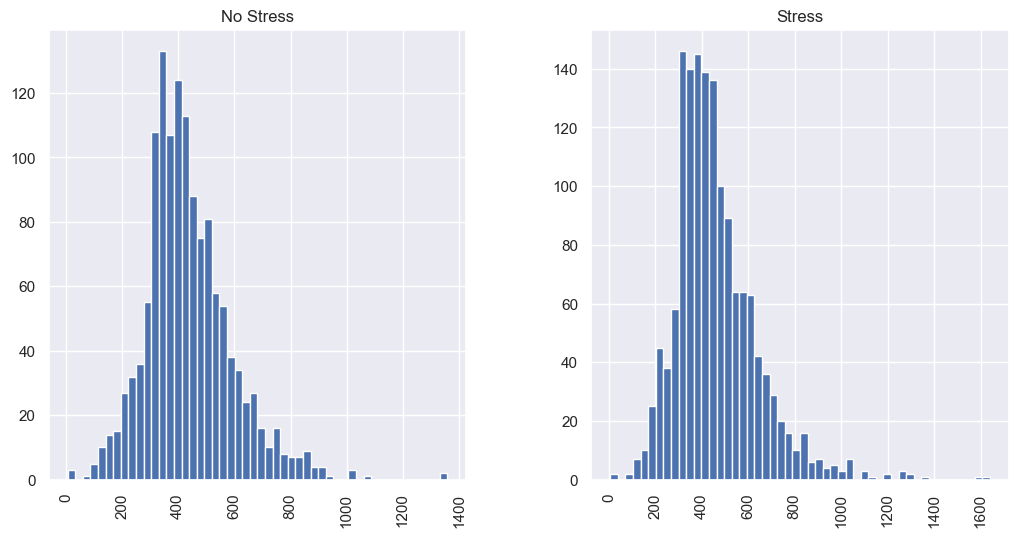

In [20]:
human_stress.hist(column='len',by='label_in_value',bins=50)
plt.show()

## Difference between stress and non stress distribution

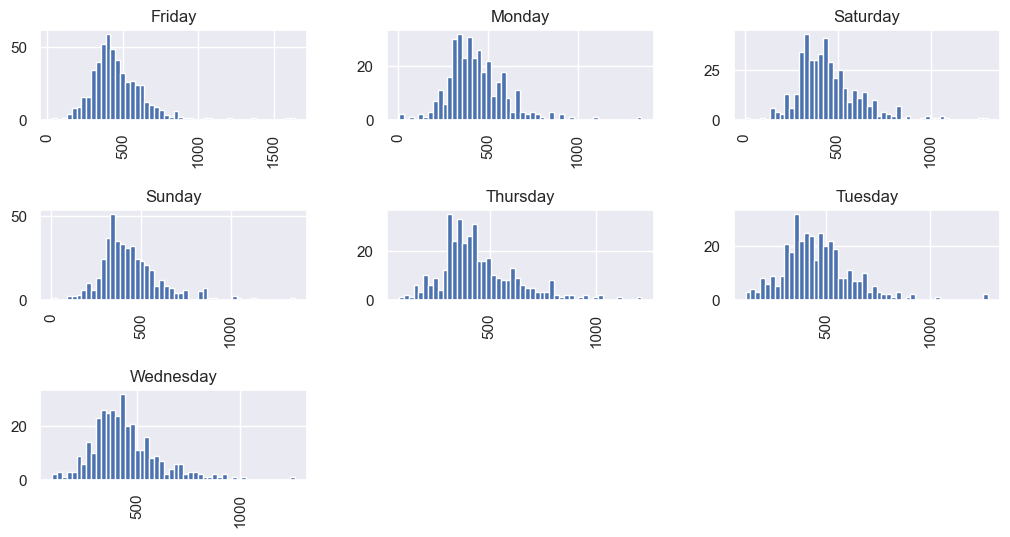

In [21]:
fig, ax = plt.subplots()
human_stress.hist(column='len',by='day_name',bins=50,ax=ax)
plt.subplots_adjust(hspace=1)
plt.show()

# Friday and Tuesday for length of the text are high 

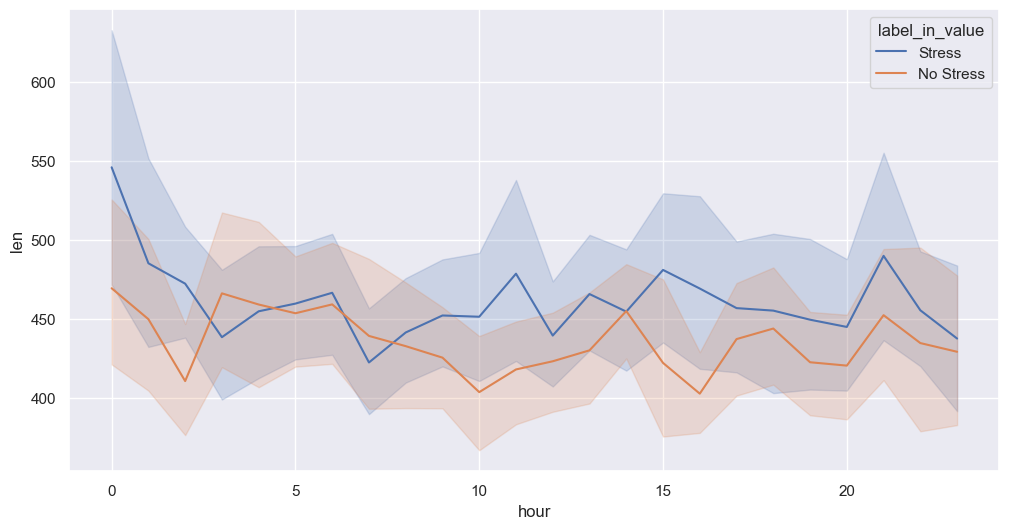

In [22]:
sns.lineplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

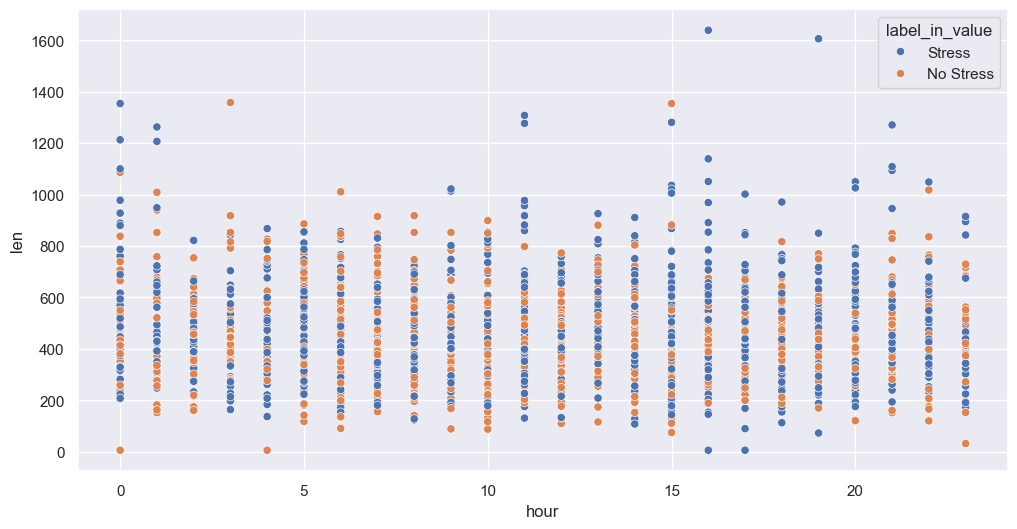

In [23]:
sns.scatterplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

# Long texts are a symptom of stress.

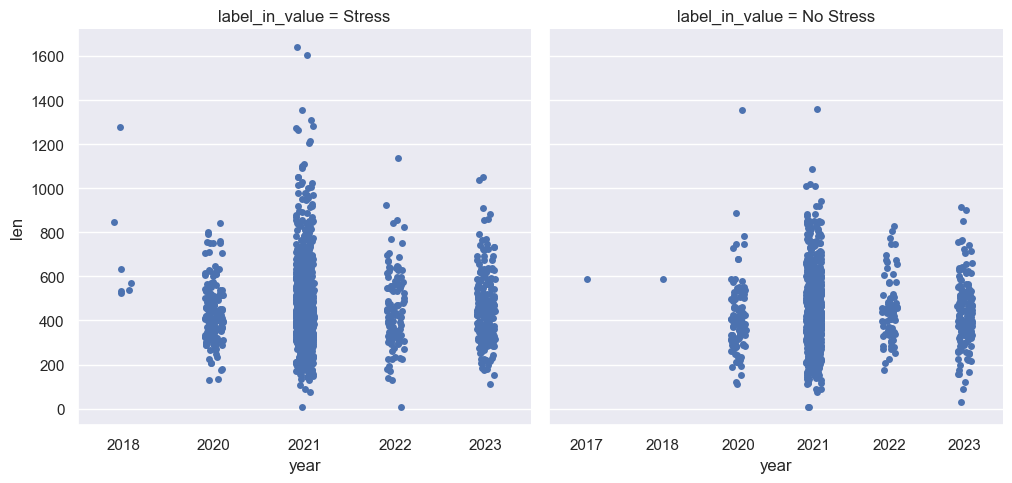

In [24]:
sns.catplot(data=human_stress,x='year',y='len',col='label_in_value',sharex=False,col_wrap=3)
plt.show()

# More length of 1000 text represents stress and cases has been increased in from 2017 to 2023 

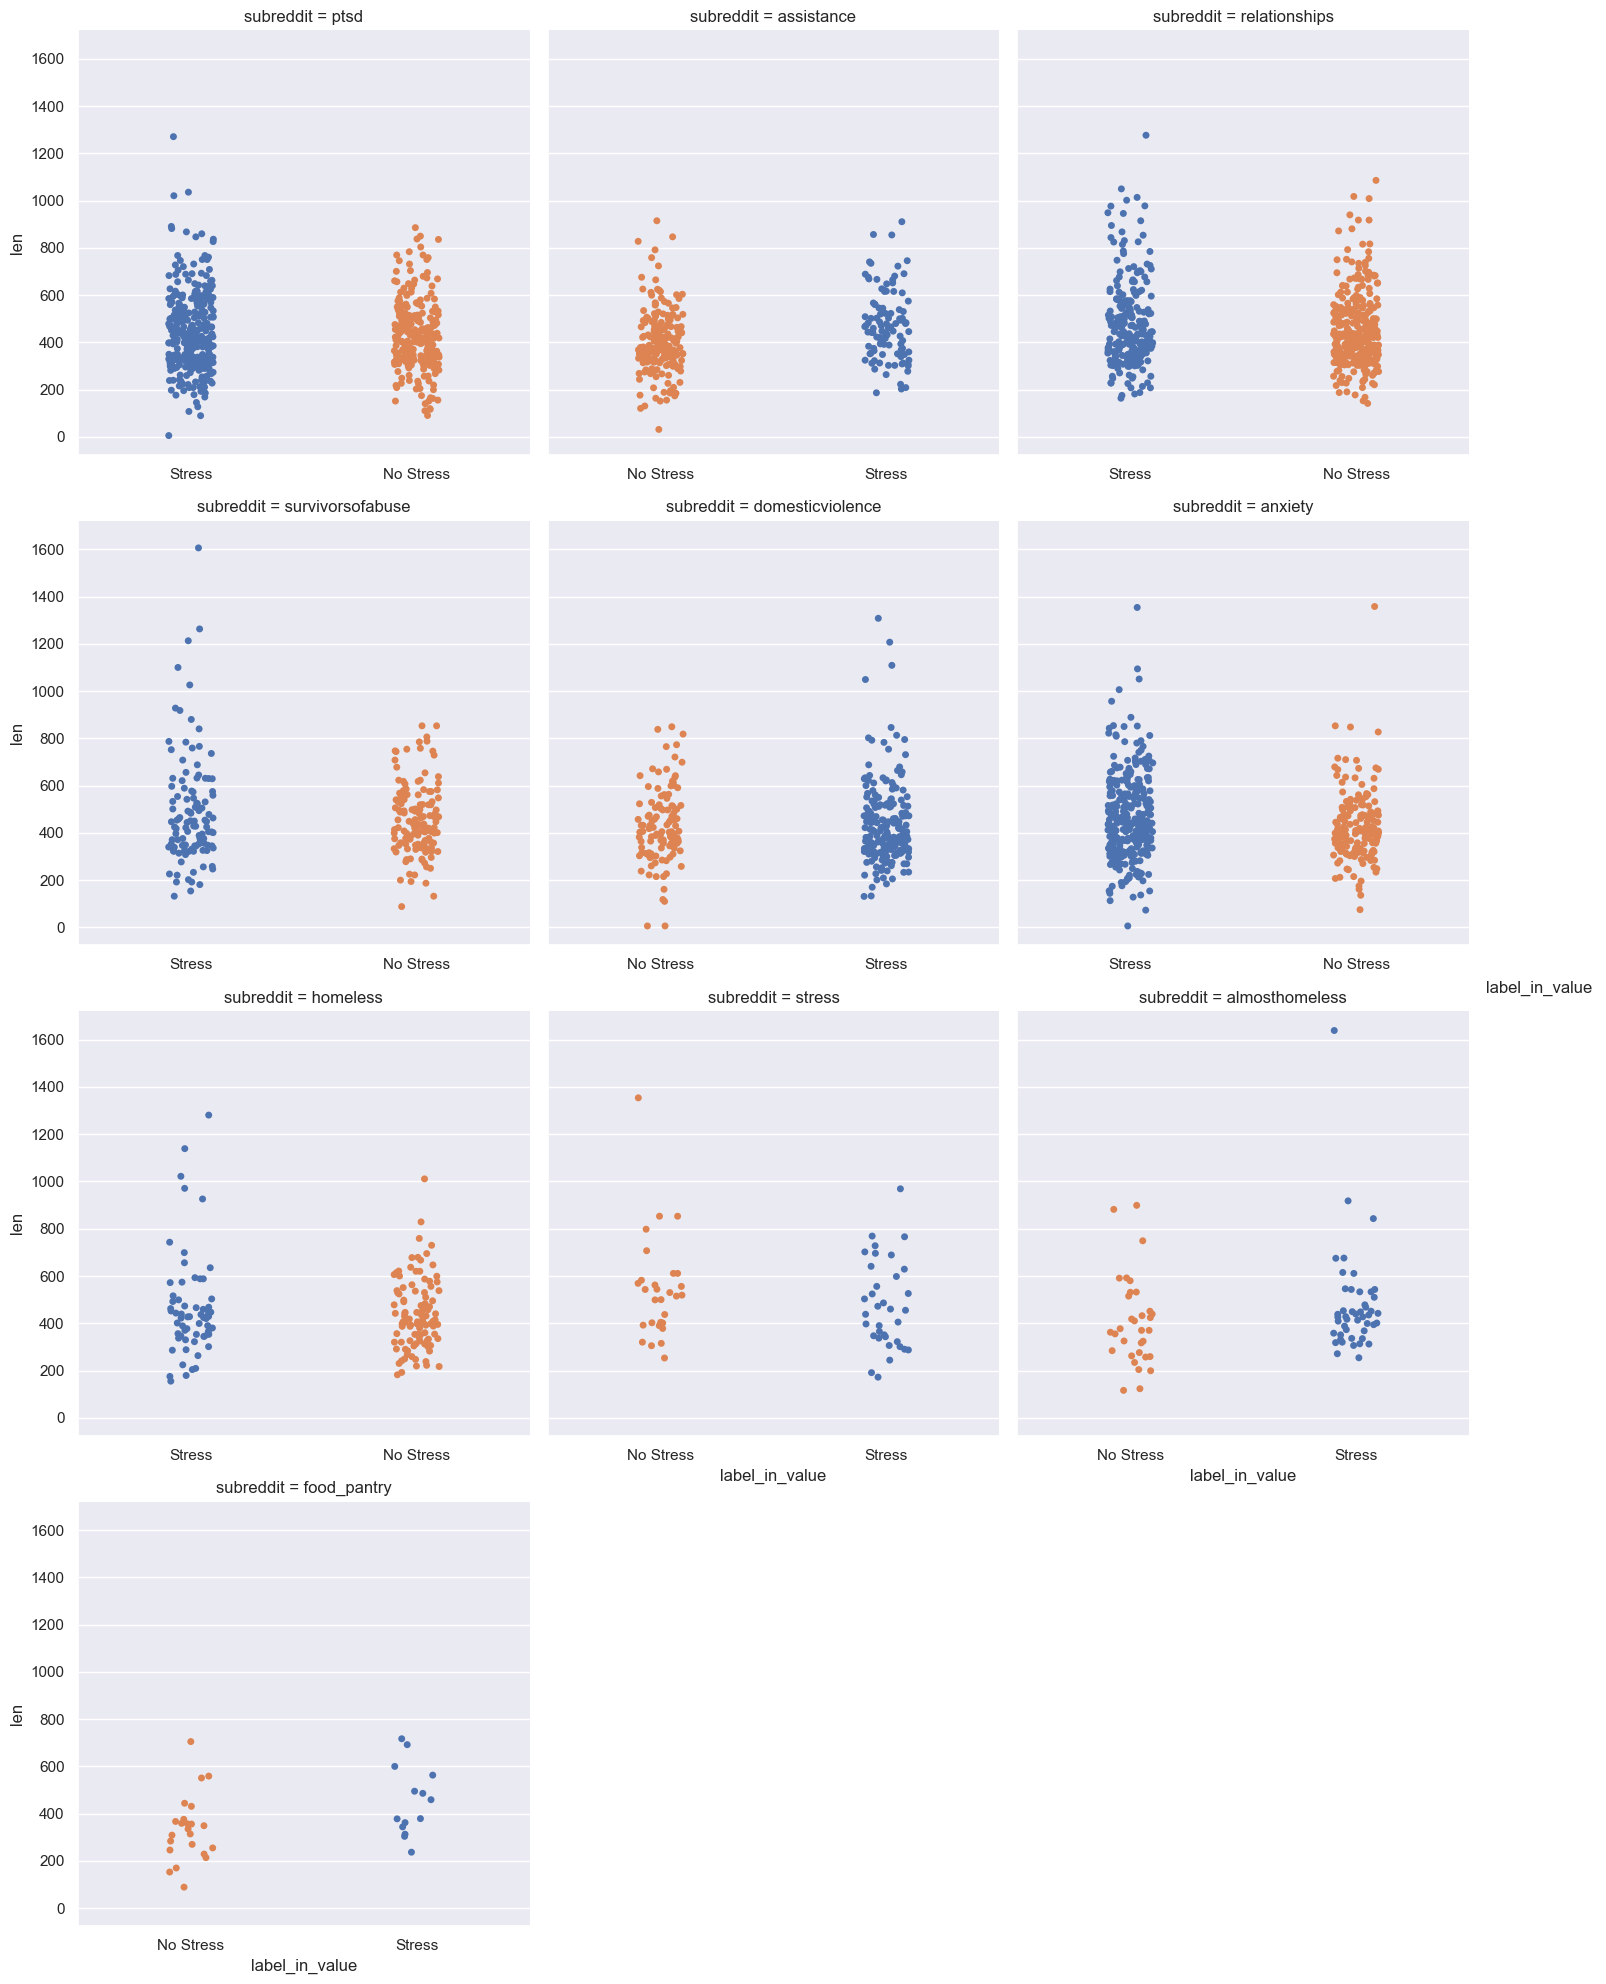

In [25]:
sns.catplot(data=human_stress,x='label_in_value',y='len',col='subreddit',col_wrap=3,hue='label_in_value',sharex=False)
plt.show()

###  Major cases are in 
#### 1. ptsd
#### 2. survivor of abuse
#### 3. Domestic violence
#### 4. Anxiety
#### 5. Homeless

# Spliting data

In [26]:
X=human_stress['text'].values
y=human_stress['label_in_value'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function for cleaning the text 

In [28]:
def text_clean(text_message):
    
    remove_punc=[ text for text in text_message if text not in string.punctuation]
    
    remove_punc= ''.join(remove_punc)
    
    return [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

# Testing of function

In [29]:
human_stress['text'].head(5)

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

# Deep Learning - Natural Language Processing

In [37]:
%pip install TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp310-cp310-win_amd64.whl (284.1 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached grpcio-1.59.2-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached google_auth-2.23.4-py2.py3-none-any.whl (183 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl (226 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached Markdown-3.5.1-py3-none-any.whl (102 kB)
  Using cached pya

You should consider upgrading via the 'c:\Users\GAREEMA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


2.14.0


# Copying the data in new variable

In [38]:
human_stree_nlp=human_stress.copy()

# Spliting data again

In [39]:
X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(human_stree_nlp['text'], human_stree_nlp['label'], test_size=0.20, random_state=42)

# Cleaning the text column of train data and test data

# Defining the parameters for tokenizing and padding

In [41]:
vocab_size=50000
embedding_dim=96
max_length=2000
trunc_type='post'
oov_tok="<oov>"


In [42]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_nlp)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(X_train_nlp)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(X_test_nlp)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

# Define a model of NLP

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 96)          4800000   
                                                                 
 global_average_pooling1d (  (None, 96)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 72)                6984      
                                                                 
 dense_1 (Dense)             (None, 1)                 73        
                                                                 
Total params: 4807057 (18.34 MB)
Trainable params: 4807057 (18.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training a model

In [44]:
num_epochs = 50

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    y_train_nlp, # training labels
    epochs=num_epochs, 
    validation_data=(test_padded, y_test_nlp) # test data
    )

Epoch 1/50
71/71 [==============================] - 14s 178ms/step - loss: 0.6927 - accuracy: 0.5211 - val_loss: 0.6904 - val_accuracy: 0.5370
Epoch 2/50
71/71 [==============================] - 11s 160ms/step - loss: 0.6923 - accuracy: 0.5211 - val_loss: 0.6899 - val_accuracy: 0.5370
Epoch 3/50
71/71 [==============================] - 11s 148ms/step - loss: 0.6912 - accuracy: 0.5211 - val_loss: 0.6891 - val_accuracy: 0.5370
Epoch 4/50
71/71 [==============================] - 11s 155ms/step - loss: 0.6895 - accuracy: 0.5313 - val_loss: 0.6884 - val_accuracy: 0.6532
Epoch 5/50
71/71 [==============================] - 11s 150ms/step - loss: 0.6842 - accuracy: 0.5643 - val_loss: 0.6812 - val_accuracy: 0.7007
Epoch 6/50
71/71 [==============================] - 11s 149ms/step - loss: 0.6714 - accuracy: 0.6189 - val_loss: 0.6688 - val_accuracy: 0.6373
Epoch 7/50
71/71 [==============================] - 11s 151ms/step - loss: 0.6397 - accuracy: 0.7040 - val_loss: 0.6293 - val_accuracy: 0.6655

# Visualizating the loss and accuracy of train data and test data

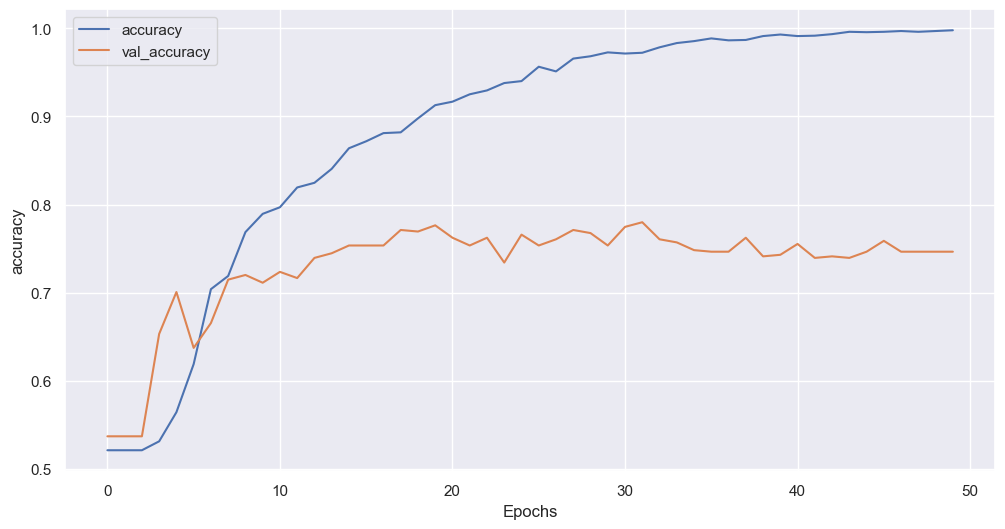

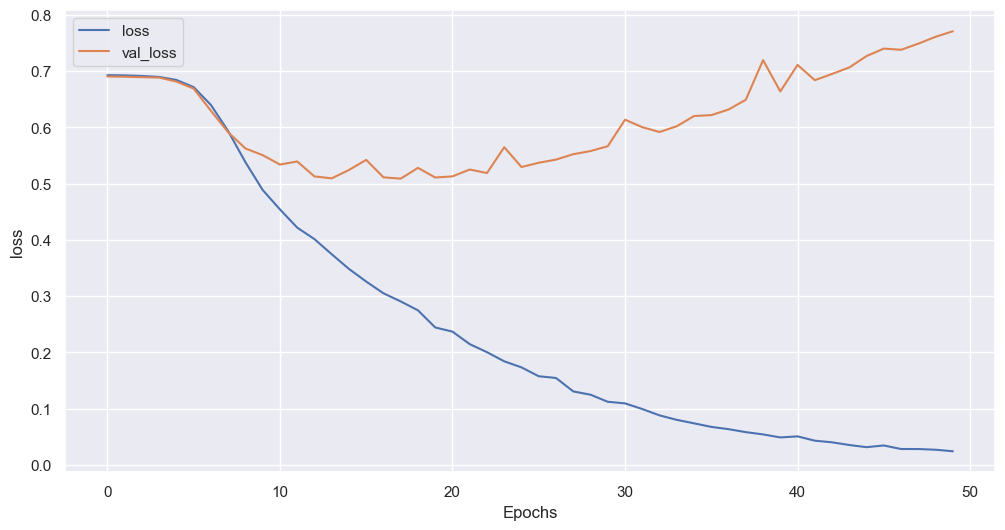

In [45]:
##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+ metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()
  
##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")

# checking the model with unseen random inputs

In [51]:
sentence = ["I am not feeling happy", 
            "these days i have been working on crucial projects and i have to focus on time delivery",
            "i am on holidays",
            'I bet all my money yesterday and lost it all ',
            "My girlfriend is in the hospital",
           "I lost my job",
            "This year i am not going to this my current year goal and i do not know how i am going to deal with this",
           "The stress is affecting every aspect of my life. I'm not enjoying things I used to, and I'm struggling to find joy in anything",
           "I'm constantly second-guessing myself and worrying about making mistakes. The stress is making it hard to make even simple decisions",
           "I'm struggling to find the motivation to do anything. The stress has drained my energy and left me feeling hopeless",
           "I feel like I'm in a constant state of crisis"]


##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
# print(model.predict(padded_seqs))
output={}
for i,seq in enumerate(padded_seqs):
    output[sentence[i]]=model.predict(np.array([seq]))[0]
output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output=output.reset_index()
print(output)

1/1 [==============================] - 0s 52ms/step
                                             sentence  prediction
0                              I am not feeling happy    0.119757
1   these days i have been working on crucial proj...    0.241632
2                                    i am on holidays    0.127942
3       I bet all my money yesterday and lost it all     0.352118
4                    My girlfriend is in the hospital    0.122134
5                                       I lost my job    0.332003
6   This year i am not going to this my current ye...    0.759508
7   The stress is affecting every aspect of my lif...    0.502141
8   I'm constantly second-guessing myself and worr...    0.804882
9   I'm struggling to find the motivation to do an...    0.809339
10      I feel like I'm in a constant state of crisis    0.673964


# The value ranges from 0 to 0.5 indicate no stress, and as the values climb from 0.5 to 1, the degree of stress is likewise increased. This shows how effectively the model has done. 